                                        LOAN DEFAULT PREDICTIVE MODEL

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

                        Data Preparation and Exploratory Data Analysis

Loading the data into a dataframe and combining the two datasets.

In [3]:
df_0 = pd.read_csv('./LoanStats3a.csv',low_memory=False,skiprows=1)
df_0.to_pickle('2007_2011.pkl')

In [4]:
df_1 = pd.read_csv('./LoanStats3b.csv', low_memory = False, skiprows = 1)
df_1.to_pickle('2012_2013.pkl')

combining the two dataset to obtain one large dataset and pickling to reduce loading time

In [5]:
df_0 = pd.read_pickle('2007_2011.pkl')
df_1 = pd.read_pickle('2012_2013.pkl')

In [7]:
df = pd.concat([df_0, df_1], sort = False)

In [8]:
#Detailed information on the columns

df.info(verbose = False, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230705 entries, 0 to 188166
Columns: 150 entries, id to sec_app_fico_range_high
dtypes: float64(113), object(37)
memory usage: 265.8+ MB


Dropping the columns that have a lot of NA's and those that are not useful

In [9]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,settlement_date,settlement_amount,settlement_percentage,settlement_term,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,sec_app_fico_range_low,sec_app_fico_range_high
0,NaN,NaN,5000.0,5000.0,4975.000000,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.000000,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.000000,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.000000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.000000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,5000.0,5000.0,5000.000000,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,7000.0,7000.0,7000.000000,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,3000.0,3000.0,3000.000000,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,5600.0,5600.0,5600.000000,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,5375.0,5375.0,5350.000000,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.drop(['settlement_term','settlement_percentage','settlement_amount','settlement_date','settlement_status','debt_settlement_flag_date'],axis=1,inplace=True)

In [11]:
df.drop(['fico_range_low', 'fico_range_high', 'last_fico_range_high', 'last_fico_range_low', 'sec_app_fico_range_low', 'sec_app_fico_range_high'], axis = 1, inplace = True)

In [12]:
df.drop(['debt_settlement_flag','hardship_last_payment_amount','hardship_payoff_balance_amount','orig_projected_additional_accrued_interest'],axis=1,inplace=True)

In [13]:
df.drop(['hardship_loan_status','hardship_dpd','hardship_length','payment_plan_start_date','hardship_end_date','hardship_start_date','hardship_amount','deferral_term','hardship_status','hardship_reason'],axis=1,inplace=True)

In [14]:
df.drop(['hardship_type','sec_app_mths_since_last_major_derog','sec_app_collections_12_mths_ex_med','sec_app_chargeoff_within_12_mths','sec_app_num_rev_accts','sec_app_open_act_il','sec_app_revol_util','sec_app_open_acc','sec_app_mort_acc'],axis=1,inplace=True)

In [15]:
df.drop(['sec_app_inq_last_6mths','sec_app_earliest_cr_line','revol_bal_joint','total_il_high_credit_limit','total_bc_limit','total_bal_ex_mort','tot_hi_cred_lim'],axis=1,inplace=True)

In [16]:
df.drop(['percent_bc_gt_75','pct_tl_nvr_dlq','num_tl_op_past_12m','num_tl_90g_dpd_24m','num_tl_30dpd','num_tl_120dpd_2m','num_sats'],axis=1,inplace=True)

In [17]:
df.drop(['num_rev_tl_bal_gt_0','num_rev_accts','num_op_rev_tl','num_il_tl','num_bc_tl','num_bc_sats','num_actv_rev_tl'],axis=1,inplace=True)

In [18]:
df.drop(['num_actv_bc_tl','num_accts_ever_120_pd','mths_since_recent_revol_delinq','mths_since_recent_inq','mths_since_recent_bc_dlq'],axis=1,inplace=True)

In [19]:
df.drop(['mths_since_recent_bc','mort_acc','mo_sin_rcnt_tl','mo_sin_rcnt_rev_tl_op','mo_sin_old_rev_tl_op','mo_sin_old_il_acct'],axis=1,inplace=True)

In [20]:
df.drop(['bc_util','bc_open_to_buy','avg_cur_bal','acc_open_past_24mths','inq_last_12m'],axis=1,inplace=True)

In [21]:
df.drop(['total_cu_tl','inq_fi','total_rev_hi_lim','all_util','max_bal_bc'],axis=1,inplace=True)

In [22]:
df.drop(['open_rv_24m','open_rv_12m','il_util','total_bal_il','mths_since_rcnt_il'],axis=1,inplace=True)

In [23]:
df.drop(['open_il_24m','open_il_12m','open_act_il','open_acc_6m','tot_cur_bal'],axis=1,inplace=True)

In [24]:
df.drop(['tot_coll_amt','verification_status_joint','dti_joint','annual_inc_joint'],axis=1,inplace=True)

In [25]:
df.drop(['mths_since_last_major_derog'],axis=1,inplace=True)

In [26]:
df.drop(['id','member_id'],axis=1,inplace=True)

In [27]:
df.drop(['mths_since_last_delinq'],axis=1,inplace=True)

In [28]:
df.drop(['application_type'],axis=1,inplace=True)

In [29]:
df.drop(['emp_title'],axis=1,inplace=True)

In [30]:
df.drop(['title','zip_code','url'],axis=1,inplace=True)

In [31]:
df.drop(['collections_12_mths_ex_med','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','pub_rec_bankruptcies','tax_liens',],axis=1,inplace=True)

In [32]:
df.drop(['out_prncp','out_prncp_inv'],axis=1,inplace=True)

In [33]:
df.drop(['delinq_2yrs','pub_rec','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'],axis=1,inplace=True)

In [34]:
df.drop(['policy_code','hardship_flag','desc','initial_list_status','pymnt_plan'],axis=1,inplace=True)

In [35]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,addr_state,dti,earliest_cr_line,inq_last_6mths,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,next_pymnt_d
0,5000.0,5000.0,4975.000000,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,AZ,27.65,Jan-1985,1.0,NaN,3.0,13648.0,83.7%,9.0,NaN
1,2500.0,2500.0,2500.000000,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,GA,1.00,Apr-1999,5.0,NaN,3.0,1687.0,9.4%,4.0,NaN
2,2400.0,2400.0,2400.000000,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,IL,8.72,Nov-2001,2.0,NaN,2.0,2956.0,98.5%,10.0,NaN
3,10000.0,10000.0,10000.000000,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,CA,20.00,Feb-1996,1.0,NaN,10.0,5598.0,21%,37.0,NaN
4,3000.0,3000.0,3000.000000,60 months,12.69%,67.79,B,B5,1 year,RENT,...,OR,17.94,Jan-1996,0.0,NaN,15.0,27783.0,53.9%,38.0,NaN
5,5000.0,5000.0,5000.000000,36 months,7.90%,156.46,A,A4,3 years,RENT,...,AZ,11.20,Nov-2004,3.0,NaN,9.0,7963.0,28.3%,12.0,NaN
6,7000.0,7000.0,7000.000000,60 months,15.96%,170.08,C,C5,8 years,RENT,...,NC,23.51,Jul-2005,1.0,NaN,7.0,17726.0,85.6%,11.0,NaN
7,3000.0,3000.0,3000.000000,36 months,18.64%,109.43,E,E1,9 years,RENT,...,CA,5.35,Jan-2007,2.0,NaN,4.0,8221.0,87.5%,4.0,NaN
8,5600.0,5600.0,5600.000000,60 months,21.28%,152.39,F,F2,4 years,OWN,...,CA,5.55,Apr-2004,2.0,NaN,11.0,5210.0,32.6%,13.0,NaN
9,5375.0,5375.0,5350.000000,60 months,12.69%,121.45,B,B5,< 1 year,RENT,...,TX,18.08,Sep-2004,0.0,NaN,2.0,9279.0,36.5%,3.0,NaN


In [36]:
df.drop(['next_pymnt_d','mths_since_last_record'],axis=1,inplace=True)

In [41]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',3000)

In [42]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc
0,5000.0,5000.0,4975.000000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.00,Verified,Dec-2011,Fully Paid,credit_card,AZ,27.65,Jan-1985,1.0,3.0,13648.0,83.7%,9.0
1,2500.0,2500.0,2500.000000,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-2011,Charged Off,car,GA,1.00,Apr-1999,5.0,3.0,1687.0,9.4%,4.0
2,2400.0,2400.0,2400.000000,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,Dec-2011,Fully Paid,small_business,IL,8.72,Nov-2001,2.0,2.0,2956.0,98.5%,10.0
3,10000.0,10000.0,10000.000000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,Dec-2011,Fully Paid,other,CA,20.00,Feb-1996,1.0,10.0,5598.0,21%,37.0
4,3000.0,3000.0,3000.000000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.00,Source Verified,Dec-2011,Fully Paid,other,OR,17.94,Jan-1996,0.0,15.0,27783.0,53.9%,38.0
5,5000.0,5000.0,5000.000000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.00,Source Verified,Dec-2011,Fully Paid,wedding,AZ,11.20,Nov-2004,3.0,9.0,7963.0,28.3%,12.0
6,7000.0,7000.0,7000.000000,60 months,15.96%,170.08,C,C5,8 years,RENT,47004.00,Not Verified,Dec-2011,Fully Paid,debt_consolidation,NC,23.51,Jul-2005,1.0,7.0,17726.0,85.6%,11.0
7,3000.0,3000.0,3000.000000,36 months,18.64%,109.43,E,E1,9 years,RENT,48000.00,Source Verified,Dec-2011,Fully Paid,car,CA,5.35,Jan-2007,2.0,4.0,8221.0,87.5%,4.0
8,5600.0,5600.0,5600.000000,60 months,21.28%,152.39,F,F2,4 years,OWN,40000.00,Source Verified,Dec-2011,Charged Off,small_business,CA,5.55,Apr-2004,2.0,11.0,5210.0,32.6%,13.0
9,5375.0,5375.0,5350.000000,60 months,12.69%,121.45,B,B5,< 1 year,RENT,15000.00,Verified,Dec-2011,Charged Off,other,TX,18.08,Sep-2004,0.0,2.0,9279.0,36.5%,3.0


In [43]:
df.to_pickle('cleaning.pkl')

In [3]:
pick_df = pd.read_pickle('cleaning.pkl')

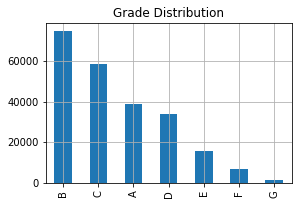

In [4]:
fig=plt.figure(figsize=(15,10))
plt.subplot2grid((3,3),(0,0))
pick_df['grade'].value_counts().plot(kind="bar",title="Grade Distribution")
plt.grid(True)

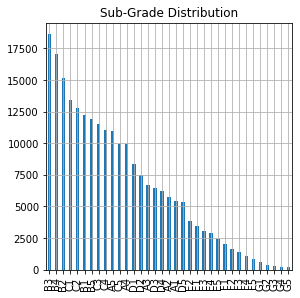

In [5]:
fig=plt.figure(figsize=(15,10))
plt.subplot2grid((2,3),(0,1))
pick_df['sub_grade'].value_counts().plot(kind='bar',title='Sub-Grade Distribution')
plt.grid(True)

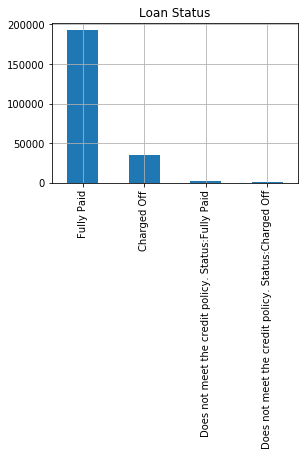

In [6]:
fig=plt.figure(figsize=(15,10))
plt.subplot2grid((3,3),(0,0))
pick_df['loan_status'].value_counts().plot(kind='bar',title='Loan Status')
plt.grid('True')

In [7]:
pick_df.loan_status.value_counts()

Fully Paid                                             192614
Charged Off                                             35337
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

The negative class will consist of Fully paid loans and the positive class will consist of charged off loans.
Acoording to Lending Club a loan becomes “charged off” when there is no longer a reasonable expectation of further payments. Charge off typically occurs when a loan is 120 days or more past due.

In [8]:
df_negClass = pick_df[pick_df['loan_status'].isin(['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid'])]

In [9]:
df_posClass = pick_df[pick_df['loan_status'].isin(['Charged Off', 'Does not meet the credit policy. Status:Charged Off'])]

combine the positive and negative classes and then binarize the loan_status column.

In [10]:
pick_df = pd.concat([df_negClass, df_posClass], sort = False)

In [11]:
pick_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,loan_status,purpose,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc
0,5000.0,5000.0,4975.000000,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,Fully Paid,credit_card,AZ,27.65,Jan-1985,1.0,3.0,13648.0,83.7%,9.0
2,2400.0,2400.0,2400.000000,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,Fully Paid,small_business,IL,8.72,Nov-2001,2.0,2.0,2956.0,98.5%,10.0
3,10000.0,10000.0,10000.000000,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,Fully Paid,other,CA,20.00,Feb-1996,1.0,10.0,5598.0,21%,37.0
4,3000.0,3000.0,3000.000000,60 months,12.69%,67.79,B,B5,1 year,RENT,...,Fully Paid,other,OR,17.94,Jan-1996,0.0,15.0,27783.0,53.9%,38.0
5,5000.0,5000.0,5000.000000,36 months,7.90%,156.46,A,A4,3 years,RENT,...,Fully Paid,wedding,AZ,11.20,Nov-2004,3.0,9.0,7963.0,28.3%,12.0
6,7000.0,7000.0,7000.000000,60 months,15.96%,170.08,C,C5,8 years,RENT,...,Fully Paid,debt_consolidation,NC,23.51,Jul-2005,1.0,7.0,17726.0,85.6%,11.0
7,3000.0,3000.0,3000.000000,36 months,18.64%,109.43,E,E1,9 years,RENT,...,Fully Paid,car,CA,5.35,Jan-2007,2.0,4.0,8221.0,87.5%,4.0
10,6500.0,6500.0,6500.000000,60 months,14.65%,153.45,C,C3,5 years,OWN,...,Fully Paid,debt_consolidation,AZ,16.12,Jan-1998,2.0,14.0,4032.0,20.6%,23.0
11,12000.0,12000.0,12000.000000,36 months,12.69%,402.54,B,B5,10+ years,OWN,...,Fully Paid,debt_consolidation,CA,10.78,Oct-1989,0.0,12.0,23336.0,67.1%,34.0
13,3000.0,3000.0,3000.000000,36 months,9.91%,96.68,B,B1,3 years,RENT,...,Fully Paid,credit_card,IL,12.56,Jul-2003,2.0,11.0,7323.0,43.1%,11.0


In [12]:
#Reset the indices
pick_df = pick_df.reset_index(drop = True)


Binarizing the loan_status column to create a new column named loan_status_binary

In [14]:
pick_df['loan_status_binary'] = (~pick_df.loan_status.isin(['Fully Paid', 
                                                  'Does not meet the credit policy. Status:Fully Paid',
                                                 ])).astype(int)

In [15]:
#shuffle the dataframe
pick_df = pick_df.reindex(np.random.permutation(pick_df.index))

In [16]:
pick_df.loan_status_binary.value_counts()

0    194602
1     36098
Name: loan_status_binary, dtype: int64

Visualzing the columns by creating graphs

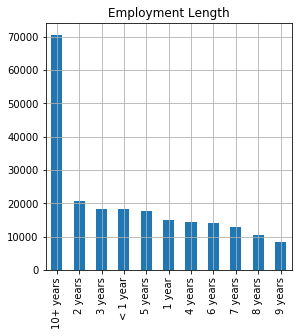

In [17]:
fig=plt.figure(figsize=(15,10))
slicee_df=pick_df['emp_length'].copy()
slicee_df.sort_values(ascending=True,inplace=True)
plt.subplot2grid((2,3),(0,0))
slicee_df.value_counts().plot(kind='bar',title='Employment Length')
plt.grid(True)

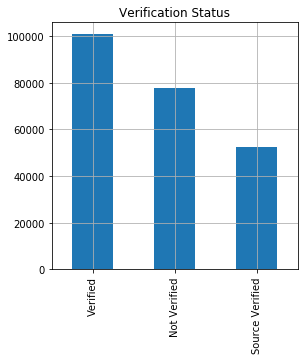

In [18]:
fig=plt.figure(figsize=(15,10))
plt.subplot2grid((2,3),(0,2))
pick_df['verification_status'].value_counts().plot(kind='bar',title='Verification Status')
plt.grid(True)

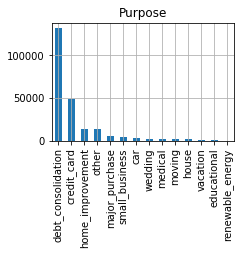

In [19]:
fig=plt.figure(figsize=(15,10))
plt.subplot2grid((4,4),(0,0))
pick_df['purpose'].value_counts().plot(kind='bar',title='Purpose')
plt.grid(True)

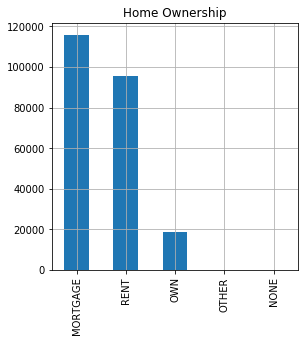

In [20]:
fig=plt.figure(figsize=(15,10))
plt.subplot2grid((2,3),(0,0))
pick_df['home_ownership'].value_counts().plot(kind='bar',title='Home Ownership')
plt.grid(True)

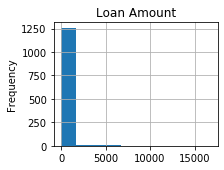

In [21]:
fig = plt.figure(figsize=(10,5))
plt.subplot2grid((2,3),(0,0))
pick_df['loan_amnt'].value_counts().plot(kind='hist',title='Loan Amount')
plt.grid(True)

creating a stacked histogram for good and bad loans for each of the grades

In [22]:
loan_status=pd.crosstab(pick_df.grade,pick_df.loan_status_binary)

In [23]:
loan_status=loan_status.div(loan_status.sum(1).astype(float),axis=0)

In [24]:
loan_status

loan_status_binary,0,1
grade,,
A,0.942469,0.057531
B,0.887966,0.112034
C,0.823440,0.176560
D,0.774501,0.225499
E,0.715912,0.284088
F,0.655871,0.344129
G,0.637752,0.362248


Text(0, 0.5, 'Loan Status')

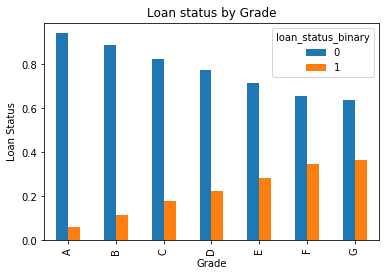

In [25]:

loan_status.plot(kind='bar',title="Loan status by Grade")
plt.xlabel('Grade')
plt.ylabel('Loan Status')

In [26]:
pick_df.drop(['grade','sub_grade','loan_status'],axis=1,inplace=True)

In [27]:
pick_df['int_rate']

107972     11.14%
138816     15.80%
135975     10.16%
186426     17.27%
218871     21.00%
           ...   
23091      14.84%
107015     22.47%
162692      7.90%
106249     17.77%
212255     15.22%
Name: int_rate, Length: 230700, dtype: object

converting int_rate to numeric(int64)

In [28]:
pick_df.int_rate=pick_df.int_rate.str.replace('%','')

In [29]:
pick_df['int_rate']=pick_df['int_rate'].apply(pd.to_numeric)

In [30]:
pick_df['int_rate']

107972    11.14
138816    15.80
135975    10.16
186426    17.27
218871    21.00
          ...  
23091     14.84
107015    22.47
162692     7.90
106249    17.77
212255    15.22
Name: int_rate, Length: 230700, dtype: float64

In [31]:

pick_df.emp_length=pick_df.emp_length.str.replace('years','')
pick_df.emp_length=pick_df.emp_length.str.replace('year','')
pick_df.emp_length.replace({'n/a':0,'< 1 ':1,'2 ':2,'3 ':3,'4 ':4,'5 ':5,'6 ':6,'7 ':7,'8 ':8,'9 ':9,'10+ ':10},inplace=True)
pick_df['emp_length']=pick_df['emp_length'].apply(pd.to_numeric)


In [33]:
pick_df.emp_length.value_counts

<bound method IndexOpsMixin.value_counts of 0        10
1         8
2         2
3         3
4         4
         ..
39784    10
39785     3
39786     3
39787     1
39788     2
Name: emp_length, Length: 39789, dtype: int64>

In [34]:
pick_df['revol_util']

0        67.9%
1        70.2%
2          95%
3        10.8%
4        29.9%
         ...  
39784    86.2%
39785    91.9%
39786    61.6%
39787    24.1%
39788    31.9%
Name: revol_util, Length: 39789, dtype: object

In [32]:
pick_df.revol_util=pick_df.revol_util.str.replace('%','')
pick_df['revol_util']=pick_df['revol_util'].apply(pd.to_numeric)

In [33]:
pick_df.drop(['issue_d'],axis=1,inplace=True)

In [35]:
pick_df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230700 entries, 107972 to 212255
Data columns (total 20 columns):
loan_amnt              230700 non-null float64
funded_amnt            230700 non-null float64
funded_amnt_inv        230700 non-null float64
term                   230700 non-null object
int_rate               230700 non-null float64
installment            230700 non-null float64
emp_length             221702 non-null float64
home_ownership         230700 non-null object
annual_inc             230696 non-null float64
verification_status    230700 non-null object
purpose                230700 non-null object
addr_state             230700 non-null object
dti                    230700 non-null float64
earliest_cr_line       230671 non-null object
inq_last_6mths         230671 non-null float64
open_acc               230671 non-null float64
revol_bal              230700 non-null float64
revol_util             230485 non-null float64
total_acc              230671 non-null float

In [36]:
pick_df.earliest_cr_line.value_counts()

Oct-2000    2016
Oct-1999    1865
Nov-2000    1799
Nov-1999    1798
Oct-2001    1756
            ... 
Jan-1962       1
Mar-1961       1
Dec-1951       1
Jun-1962       1
Jun-1964       1
Name: earliest_cr_line, Length: 621, dtype: int64

The earliest_cr_line describes the month the borrower's earliest reported credit line was opened. I will convert the column to datetime and calculate the duration from the time the credit line was opened to 2011

In [37]:
pick_df['earliest_cr_line'] = pick_df['earliest_cr_line'].apply(pd.to_datetime)
end = np.datetime64('2011-12', 'D')
pick_df['earliest_cr_line'] = pd.Timestamp(end) - pick_df['earliest_cr_line']
pick_df['earliest_cr_line'] = pick_df['earliest_cr_line'] / np.timedelta64(1, 'D')
pick_df['earliest_cr_line'] = pick_df.earliest_cr_line.replace("NaN", 0)

Here are the final selected columns

In [39]:
pick_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230700 entries, 107972 to 212255
Data columns (total 20 columns):
loan_amnt              230700 non-null float64
funded_amnt            230700 non-null float64
funded_amnt_inv        230700 non-null float64
term                   230700 non-null object
int_rate               230700 non-null float64
installment            230700 non-null float64
emp_length             221702 non-null float64
home_ownership         230700 non-null object
annual_inc             230696 non-null float64
verification_status    230700 non-null object
purpose                230700 non-null object
addr_state             230700 non-null object
dti                    230700 non-null float64
earliest_cr_line       230671 non-null float64
inq_last_6mths         230671 non-null float64
open_acc               230671 non-null float64
revol_bal              230700 non-null float64
revol_util             230485 non-null float64
total_acc              230671 non-null floa

      Dealing with missing values: Data Imputation

In [40]:
obj_cols=pick_df.columns[pick_df.dtypes==object]

#Imputer function
imputer = lambda x:x.fillna(x.value_counts().index[0])

#Impute dtype=object with most frequent value
pick_df[obj_cols]=pick_df[obj_cols].apply(imputer)

#Impute the rest of df with median
pick_df = pick_df.fillna(pick_df.median(axis=0))


An analysis of the continous variable data

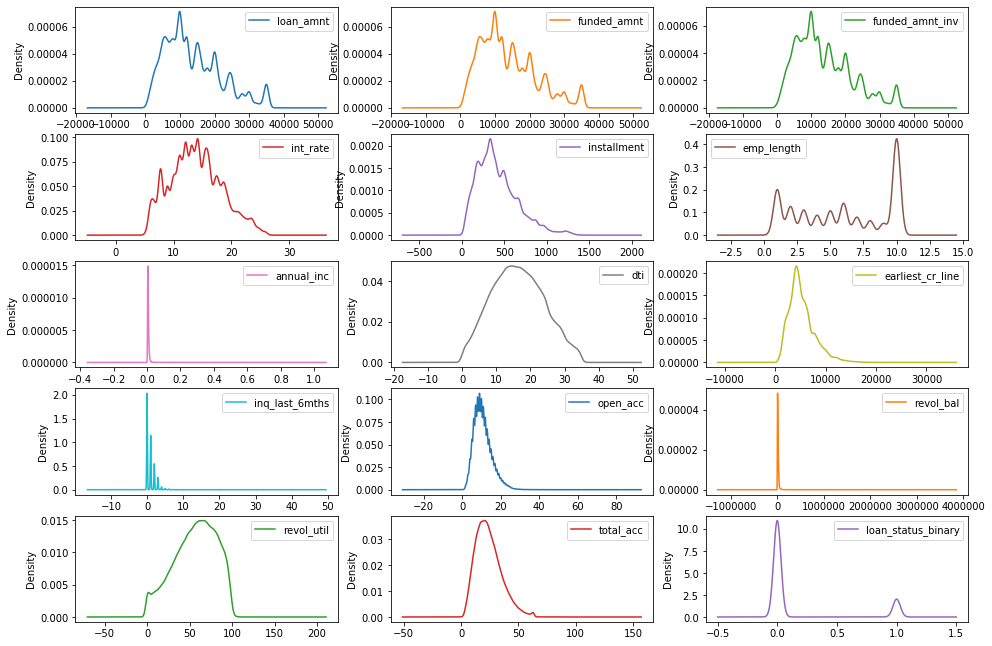

In [41]:
pick_df.plot(kind='density',subplots=True,sharex=False,layout=(7,3),figsize=(16,16))
plt.show()

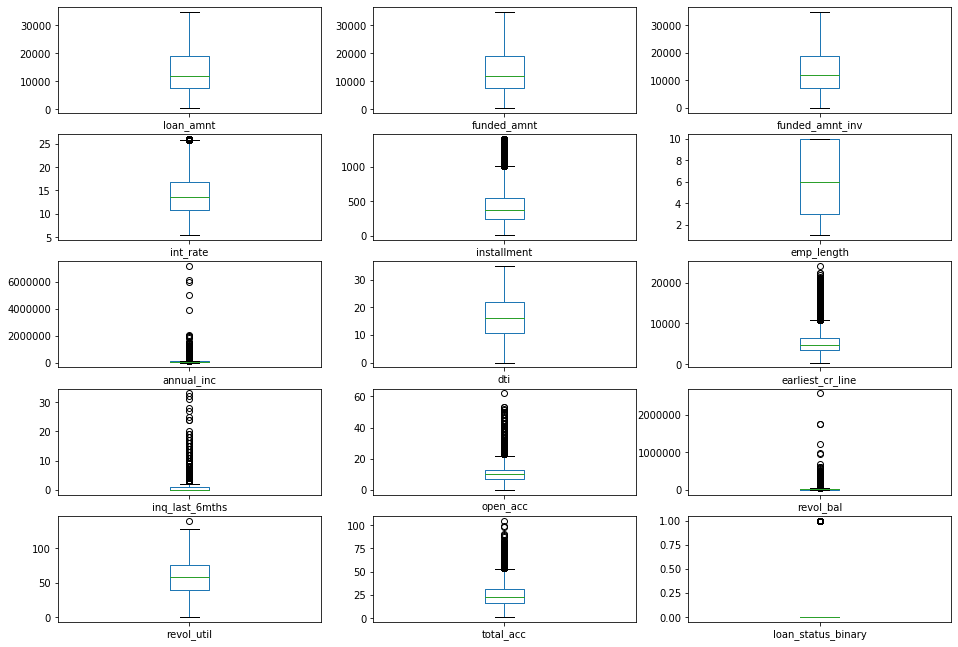

In [42]:
pick_df.plot(kind='box',layout=(7,3),sharex=False,figsize=(16,16),subplots=True)
plt.show()

                        Analysis of the categorical data

Text(0, 0.5, 'Loan status')

<Figure size 1080x720 with 0 Axes>

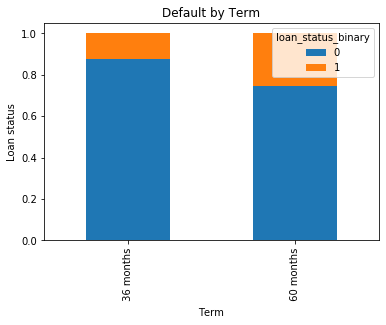

In [43]:
term_status=pd.crosstab(pick_df.term,pick_df.loan_status_binary)
term_status=term_status.div(term_status.sum(1).astype(float),axis=0)
fig=plt.figure(figsize=(15,10))
term_status.plot(kind='bar',stacked=True,title='Default by Term')
plt.xlabel('Term')
plt.ylabel('Loan status')

Text(0.5, 1.0, 'Comparison of the interest rate with Loan status')

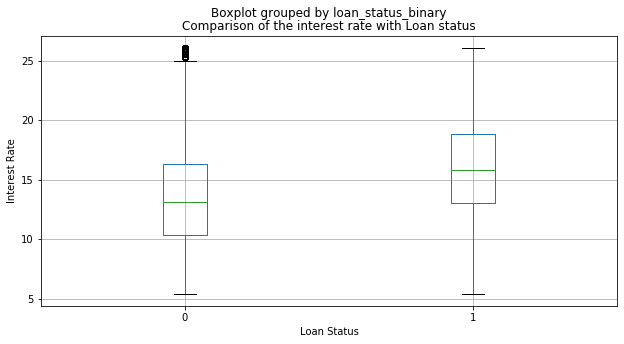

In [44]:
pick_df.boxplot(column='int_rate',by='loan_status_binary',figsize=(10,5))
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.title('Comparison of the interest rate with Loan status')

Text(0.5, 1.0, 'Comparison of the employment length with loan status')

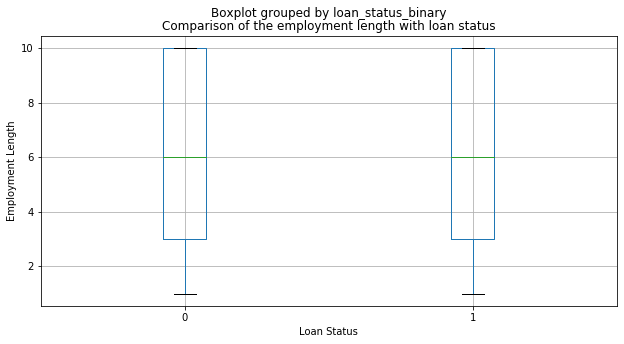

In [45]:
pick_df.boxplot(column='emp_length',by='loan_status_binary',figsize=(10,5),grid=True)
plt.xlabel('Loan Status')
plt.ylabel('Employment Length')
plt.title('Comparison of the employment length with loan status')

In [46]:
loan_status=pd.crosstab(pick_df.emp_length,pick_df.loan_status_binary)
loan_status=loan_status.div(loan_status.sum(1).astype(int),axis=0)
loan_status

loan_status_binary,0,1
emp_length,,
1.0,0.846371,0.153629
2.0,0.850345,0.149655
3.0,0.848382,0.151618
4.0,0.847730,0.152270
5.0,0.847360,0.152640
6.0,0.823279,0.176721
7.0,0.837918,0.162082
8.0,0.841047,0.158953
9.0,0.839967,0.160033


Text(0, 0.5, 'Employment Length')

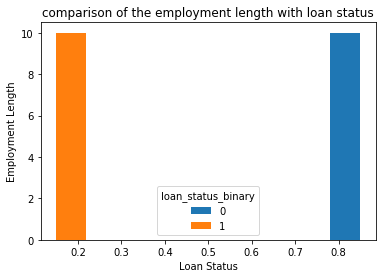

In [47]:
loan_status.plot(kind='hist',title='comparison of the employment length with loan status')
plt.xlabel('Loan Status')
plt.ylabel('Employment Length')

Text(0, 0.5, 'Loan status')

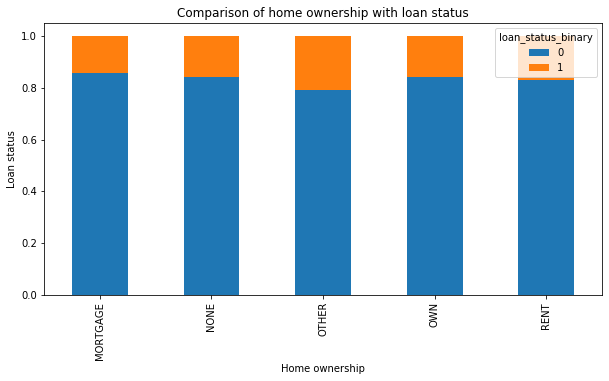

In [48]:
home_ownship=pd.crosstab(pick_df.home_ownership,pick_df.loan_status_binary)
home_ownship=home_ownship.div(home_ownship.sum(1).astype(float),axis=0)
home_ownship.plot(kind='bar',stacked=True,title='Comparison of home ownership with loan status',figsize=(10,5))
plt.xlabel('Home ownership')
plt.ylabel('Loan status')

Text(0, 0.5, 'Loan Status')

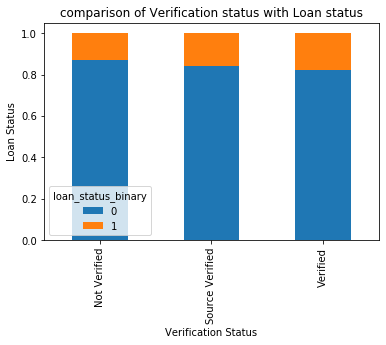

In [49]:
verif_status=pd.crosstab(pick_df.verification_status,pick_df.loan_status_binary)
verif_status=verif_status.div(verif_status.sum(1).astype(float),axis=0)
verif_status.plot(kind='bar',stacked=True,title='comparison of Verification status with Loan status')
plt.xlabel('Verification Status')
plt.ylabel('Loan Status')

Text(0, 0.5, 'Loan status')

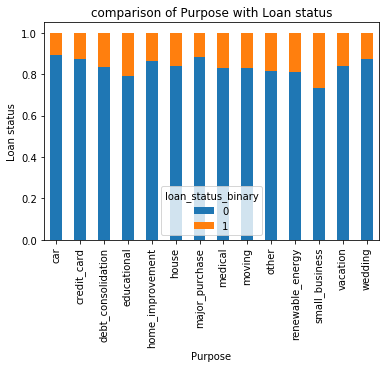

In [50]:
purpse=pd.crosstab(pick_df.purpose,pick_df.loan_status_binary)
purpse=purpse.div(purpse.sum(1).astype(float),axis=0)
purpse.plot(kind='bar',stacked=True,title='comparison of Purpose with Loan status')
plt.xlabel('Purpose')
plt.ylabel('Loan status')

Text(0, 0.5, 'Loan Status')

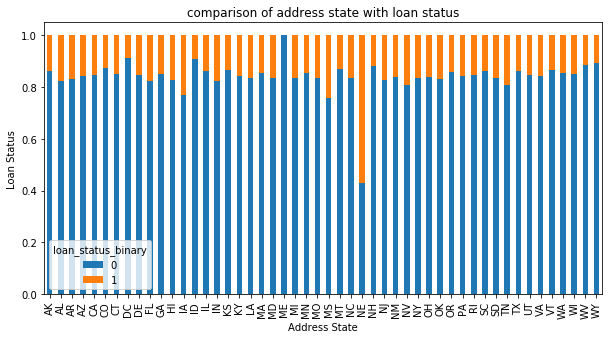

In [51]:
address_state=pd.crosstab(pick_df.addr_state,pick_df.loan_status_binary)
address_state=address_state.div(address_state.sum(1).astype(float),axis=0)
address_state.plot(kind='bar',stacked=True,title='comparison of address state with loan status',figsize=(10,5))
plt.xlabel('Address State')
plt.ylabel('Loan Status')

In [52]:
pick_df.drop(['addr_state'],axis=1,inplace=True)


Dummy Encoding for Categorical Data

In [53]:
categorical_columns = pick_df.columns[pick_df.dtypes == object]
df_dummy = pd.get_dummies(pick_df[categorical_columns])


In [54]:
#drop the categorical data already encoded
pick_df.drop(categorical_columns,axis=1, inplace = True)

In [55]:
#join the dummy encoded variable to the original Dataframe
pick_df = pick_df.join(df_dummy)

Addressing Multicollinearity

In [56]:
corrmatrix = pick_df.corr().abs()
corrmatrix = corrmatrix.stack()
corrmatrix[(corrmatrix > 0.6) & (corrmatrix != 1.0)].sort_values(ascending = True)

verification_status_Verified      verification_status_Not Verified    0.627323
verification_status_Not Verified  verification_status_Verified        0.627323
total_acc                         open_acc                            0.673938
open_acc                          total_acc                           0.673938
home_ownership_RENT               home_ownership_MORTGAGE             0.847228
home_ownership_MORTGAGE           home_ownership_RENT                 0.847228
installment                       funded_amnt_inv                     0.947777
funded_amnt_inv                   installment                         0.947777
installment                       loan_amnt                           0.951932
loan_amnt                         installment                         0.951932
installment                       funded_amnt                         0.956580
funded_amnt                       installment                         0.956580
funded_amnt_inv                   loan_amnt         

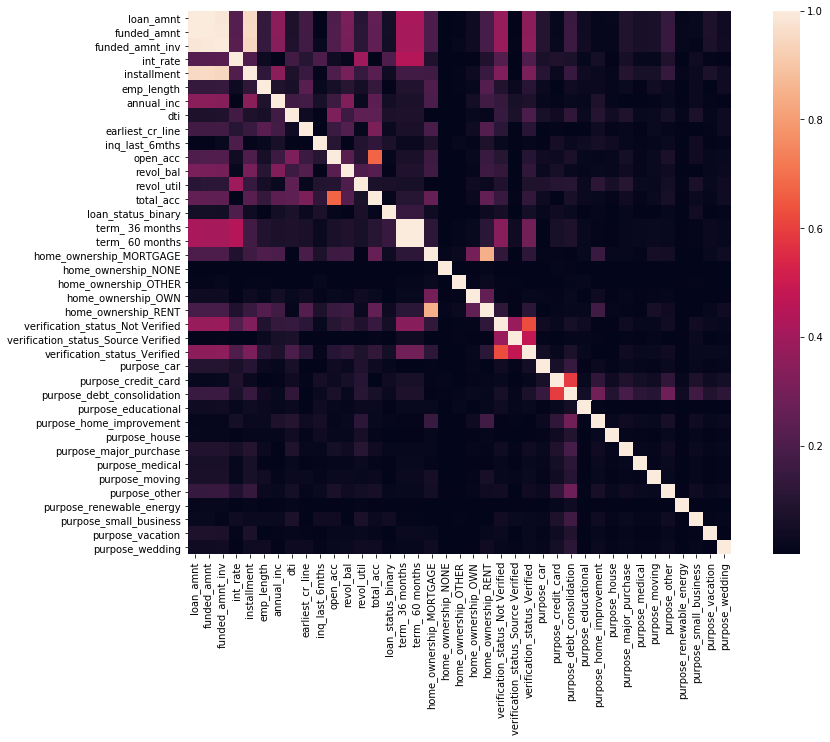

In [57]:
f, ax = plt.subplots(figsize = (15,10))
sns.heatmap(pick_df.corr().abs(), square = True)

below are the final selected columns I will model on

In [58]:
pick_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230700 entries, 107972 to 212255
Data columns (total 39 columns):
loan_amnt                              230700 non-null float64
funded_amnt                            230700 non-null float64
funded_amnt_inv                        230700 non-null float64
int_rate                               230700 non-null float64
installment                            230700 non-null float64
emp_length                             230700 non-null float64
annual_inc                             230700 non-null float64
dti                                    230700 non-null float64
earliest_cr_line                       230700 non-null float64
inq_last_6mths                         230700 non-null float64
open_acc                               230700 non-null float64
revol_bal                              230700 non-null float64
revol_util                             230700 non-null float64
total_acc                              230700 non-null float64
lo

In [59]:
pick_df.loan_status_binary.value_counts()

0    194602
1     36098
Name: loan_status_binary, dtype: int64

Re-order the loan_status_binary column first.

In [64]:
pick_df.columns.get_loc("loan_amnt")

14

In [62]:
columns = list(pick_df.columns.values)
nw = columns[0]
columns[0] = columns[14]
columns[14] = nw
pick_df = pick_df[columns]



In [63]:
pick_df

,loan_status_binary,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,earliest_cr_line,inq_last_6mths,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
107972,0,19400.0,19375.0,11.14,636.42,6.0,187000.0,4.11,4536.0,3.0,...,1,0,0,0,0,0,0,0,0,0
138816,0,28000.0,28000.0,15.80,981.64,4.0,190000.0,25.81,6727.0,0.0,...,0,0,0,0,0,1,0,0,0,0
135975,0,8000.0,7975.0,10.16,258.74,1.0,145000.0,15.81,3044.0,2.0,...,0,0,0,0,0,0,0,0,0,0
186426,0,30000.0,30000.0,17.27,1073.62,6.0,62000.0,19.08,3774.0,0.0,...,0,0,0,0,0,0,0,0,0,1
218871,1,14600.0,14600.0,21.00,550.06,6.0,38000.0,21.76,2860.0,1.0,...,0,0,0,0,0,1,0,0,0,0
74347,0,8000.0,8000.0,6.03,243.49,5.0,29000.0,25.53,7488.0,0.0,...,0,0,0,0,0,0,0,0,0,0
176111,0,19125.0,19050.0,16.29,468.04,10.0,50000.0,7.92,7914.0,1.0,...,0,0,0,0,0,1,0,0,0,0
113965,0,8000.0,8000.0,14.09,273.78,7.0,85000.0,21.13,6665.0,2.0,...,0,0,0,0,0,0,0,0,0,0
120860,0,19750.0,19700.0,15.80,478.19,6.0,45000.0,18.37,6209.0,0.0,...,0,0,0,0,0,0,0,0,0,0
54046,0,12000.0,12000.0,17.10,298.88,10.0,125000.0,26.02,9100.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
pick_df.to_pickle("loan.pkl")

BUILDING PREDICTION MODEL

In [65]:
import sklearn

In [67]:
sklearn.__version__

'0.22'

In [8]:
pick_df = pd.read_pickle("loan.pkl")

In [9]:
corrmatrix = pick_df.corr().abs()
corrmatrix = corrmatrix.stack()
corrmatrix[(corrmatrix > 0.6) & (corrmatrix != 1.0)].sort_values(ascending = True)

verification_status_Verified      verification_status_Not Verified    0.627323
verification_status_Not Verified  verification_status_Verified        0.627323
total_acc                         open_acc                            0.673938
open_acc                          total_acc                           0.673938
home_ownership_RENT               home_ownership_MORTGAGE             0.847228
home_ownership_MORTGAGE           home_ownership_RENT                 0.847228
funded_amnt_inv                   installment                         0.947777
installment                       funded_amnt_inv                     0.947777
loan_amnt                         installment                         0.951932
installment                       loan_amnt                           0.951932
funded_amnt                       installment                         0.956580
installment                       funded_amnt                         0.956580
funded_amnt_inv                   loan_amnt         

In [10]:
highly_correlated_columns = ["funded_amnt", "funded_amnt_inv", "installment"]

In [11]:
#Dropping the highly correlated columns

pick_df.drop(highly_correlated_columns, axis = 1, inplace = True)

test/train splitting

In [12]:
X = pick_df.iloc[:,1:]

In [13]:
X

,int_rate,emp_length,annual_inc,dti,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
107972,11.14,6.0,187000.0,4.11,4536.0,3.0,6.0,7915.0,41.0,19.0,...,1,0,0,0,0,0,0,0,0,0
138816,15.80,4.0,190000.0,25.81,6727.0,0.0,14.0,16151.0,28.6,37.0,...,0,0,0,0,0,1,0,0,0,0
135975,10.16,1.0,145000.0,15.81,3044.0,2.0,20.0,16331.0,40.9,44.0,...,0,0,0,0,0,0,0,0,0,0
186426,17.27,6.0,62000.0,19.08,3774.0,0.0,10.0,2959.0,20.3,21.0,...,0,0,0,0,0,0,0,0,0,1
218871,21.00,6.0,38000.0,21.76,2860.0,1.0,14.0,12191.0,67.4,21.0,...,0,0,0,0,0,1,0,0,0,0
74347,6.03,5.0,29000.0,25.53,7488.0,0.0,9.0,3423.0,7.6,14.0,...,0,0,0,0,0,0,0,0,0,0
176111,16.29,10.0,50000.0,7.92,7914.0,1.0,8.0,11884.0,71.2,13.0,...,0,0,0,0,0,1,0,0,0,0
113965,14.09,7.0,85000.0,21.13,6665.0,2.0,12.0,16632.0,58.3,24.0,...,0,0,0,0,0,0,0,0,0,0
120860,15.80,6.0,45000.0,18.37,6209.0,0.0,17.0,28108.0,61.1,36.0,...,0,0,0,0,0,0,0,0,0,0
54046,17.10,10.0,125000.0,26.02,9100.0,1.0,12.0,58338.0,62.6,26.0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
Y = pick_df.iloc[:,0]

In [15]:
Y

107972    0
138816    0
135975    0
186426    0
218871    1
         ..
23091     0
107015    0
162692    0
106249    0
212255    1
Name: loan_status_binary, Length: 230700, dtype: int32

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

Building the Loan predictive model over several algorithms: Logistic Regression(LR), Random Forest(RF), Gradient Boosted Regression and support vector Machine(SVM)

Setting up a workflow with pipeline

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline

C:\Users\MARAAM\Miniconda3\envs\snowflaskes\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\MARAAM\Miniconda3\envs\snowflaskes\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\MARAAM\Miniconda3\envs\snowflaskes\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base mod

In [18]:
from sklearn.svm import SVC
from sklearn import svm

svm_pipeline = Pipeline([('smt', SMOTE(random_state = 1, kind = 'borderline1', ratio = 'auto')),
                          ('scaler', StandardScaler()),
                          ('classifier', svm.SVC(random_state = 1))
                        ])

lr_pipeline = Pipeline([('smt', SMOTE(random_state = 5, kind = 'borderline1', ratio = 'auto')),
                        ('scaler', StandardScaler()),
                        ('classifier', LR(random_state = 5))
                       ])
rf_pipeline = Pipeline([('smt', SMOTE(random_state = 5, kind = 'borderline1', ratio = 'auto')),
                        ('scaler', StandardScaler())
                        
                       ])
nb_pipeline = Pipeline([('smt', SMOTE(random_state = 5, kind = 'borderline1', ratio = 'auto')),
                        ('scaler', StandardScaler()),
                        ('classifier', GNB())
                       ])
gb_pipeline = Pipeline([('smt', SMOTE(random_state = 5, kind = 'borderline1', ratio ='auto')),
                        ('scaler', StandardScaler()),
                        ('classifier', GBC())
                       ])

Hyperparameter optimization

Using GridSearch and Cross Validation to optimize on the model hyperparameters          

In [19]:
from sklearn.model_selection import GridSearchCV

#GridSearch for Logistic Regression
lr_param_range = [0.001, 0.01, 0.1]
lr_class_weight = [{0:0.01, 1:0.99}, {0:0.80, 1:0.20}]
lr_param_grid = [{'classifier__C':lr_param_range,
                  'classifier__class_weight':lr_class_weight
                 }]
gridsearch_lr = GridSearchCV(estimator = lr_pipeline,
                             param_grid = lr_param_grid,
                             n_jobs = -1,
                             cv = 5)




In [20]:

#GridSearch for Random Forest


rf_class_weight = [{0:0.01, 1:0.99}, {0:0.10, 1:0.90}, {0:0.80,1:0.20}]
rf_param_grid = [
                 {'class_weight':rf_class_weight,
                  'max_features':["auto", "sqrt", "log2"],
                  'n_estimators': [20, 50],
                  'min_samples_leaf': [5, 10],
                  'min_samples_split': [100, 200],
                  'criterion': ["entropy","gini"]
                 }
                ]
rf_classifier = RF()

gridsearch_rf = GridSearchCV(#estimator = rf_pipeline,
                             rf_classifier,
                             param_grid = rf_param_grid,
                             n_jobs = -1,
                             cv = 5,
                             refit = True
                            )

In [21]:

#GridSearch for Gradient Boosting Classifier
gb_param_grid = [{'classifier__n_estimators': [1000],
                  'classifier__max_features': ["sqrt"],
                  'classifier__min_samples_leaf': [9, 13],
                  'classifier__learning_rate': [0.05, 0.01]
                }]
gridsearch_gb = GridSearchCV(estimator = gb_pipeline,
                             param_grid = gb_param_grid,
                             n_jobs = -1,
                             cv = 2
                            )

In [22]:
#GridSearch for Support Vector Machine

svm_param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
svm_param_grid = [{'classifier__C': svm_param_range,
                   'classifier__kernel': ['linear']},
                  {'classifier__C': svm_param_range,
                   'classifier__gamma': svm_param_range,
                   'classifier__kernel': ['rbf']}]
gridsearch_svm = GridSearchCV(estimator = svm_pipeline,
                              param_grid = svm_param_grid,
                              n_jobs = -1,
                              cv = 10)

Checking the number of entries so I can take half of them 

In [21]:
pick_df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230700 entries, 107972 to 212255
Columns: 36 entries, loan_status_binary to purpose_wedding
dtypes: float64(11), int32(1), uint8(24)
memory usage: 27.3 MB


In [22]:
df_half = pick_df[0:115300]

In [23]:
x_gs_train = df_half.iloc[:,1:]
y_gs_train = df_half.iloc[:,0]

In [24]:
import dill

In [87]:

#Fitting the dataset to get the hyperparameters
gridsearch_lr.fit(x_gs_train, y_gs_train)
gridsearch_best_estimator_lr = gridsearch_lr.best_estimator_
dill.dump(gridsearch_best_estimator_lr, open('LogisticRegression_gridsearch_classweight.pkl', 'wb'))

C:\Users\MARAAM\Miniconda3\envs\snowflaskes\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\MARAAM\Miniconda3\envs\snowflaskes\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\MARAAM\Miniconda3\envs\snowflaskes\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [88]:
gridsearch_rf.fit(x_gs_train, y_gs_train)
gridsearch_best_estimator_rf = gridsearch_rf.best_estimator_
dill.dump(gridsearch_best_estimator_rf, open('RandomForest_gridsearch_classweight.pkl', 'wb'))

In [89]:
pick_df.to_pickle("grid.pkl")

In [23]:
pick_df = pd.read_pickle('grid.pkl')

In [91]:
gridsearch_gb.fit(x_gs_train, y_gs_train)
gridsearch_best_estimator_gb = gridsearch_gb.best_estimator_
dill.dump(gridsearch_best_estimator_gb, open('GradientBoosting_gridsearch_classweight.pkl', 'wb'))

C:\Users\MARAAM\Miniconda3\envs\snowflaskes\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\MARAAM\Miniconda3\envs\snowflaskes\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\MARAAM\Miniconda3\envs\snowflaskes\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [92]:
pick_df.to_pickle('gb.pkl')

In [24]:
pick_df = pd.read_pickle('gb.pkl')

In [ ]:
gridsearch_svm.fit(x_gs_train, y_gs_train)
gridsearch_best_estimator_svm = gridsearch_svm.best_estimator_
dill.dump(gridsearch_best_estimator_svm, open('SupportVectorMachine_gridsearch_classweight.pkl', 'wb'))

Model Training and Evaluation

In [25]:
#Function to draw a confusion matrix

def draw_confusion_matrix(conf_matrix, classifier_name):
    fig, ax = plt.subplots(figsize = (5,5))
    ax.matshow(conf_matrix, cmap = plt.cm.Greens, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
         for j in range(conf_matrix.shape[1]):
                 ax.text(x=j, y=i, s=conf_matrix[i, j], va = 'center', ha = 'center')
    plt.title('Confusion Matrix for %s' % classifier_name)
    plt.xlabel('Predicted label')
    plt.ylabel('True')
    
    plt.tight_layout()
    plt.show()
                 
        

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from scipy import interp

In [29]:
def run_cv(X, Y, classifier, clf_name):
    
    #Construct a kfolds object
    kf = StratifiedKFold(n_splits=5,shuffle=True)

    
    accuracy_scores = []
            
    #Initialize ROC variables
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    
    clf = classifier
    
    y_pred_full = Y.copy()
    
    fig, ax = plt.subplots()
    
    #Iterate through folds
    for i, (train_index, test_index) in enumerate(kf.split(X,Y)):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train = Y.iloc[train_index]
        Y_test = Y.iloc[test_index]
            
     #Train the classifier on the training data
        clf_fit = clf.fit(X_train,Y_train)
          
         #Get probabilities and compute area under ROC curve
        viz = plot_roc_curve(clf, X_test, Y_test, name = 'ROC fold {}'.format(i), alpha=0.3, lw = 1, ax = ax)            
        interp_tpr = interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)
        
        #Obtain a prediction on the test set
        y_pred = clf_fit.predict(X_test)
        
        #Map the prediction for this fold to the full dataset
        y_pred_full.iloc[test_index] = y_pred
    
        #Calculate the accuracy of the prediction on current fold
        accuracy_scores.append(accuracy_score(y_true=Y_test, y_pred=y_pred))
        
        
        
    
    #Get Evaluation metrics    
    #Draw ROC Curve    
    mean_tpr = np.mean(tprs, axis = 0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    
    ax.plot([0, 1], 
             [0, 1], 
             '--', 
             color=(0.6, 0.6, 0.6), 
             label='Luck',
             alpha =.8
            )
    
    ax.plot([0, 0, 1], 
             [0, 1, 1], 
             lw=2,
             linestyle=':',
             color='black',
             label='Perfect Performance')
    
    ax.plot(mean_fpr, 
             mean_tpr, 
             'k--',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)
    
#     std_tpr = np.std(tprs, axis = 0)
#     tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
#     tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#     ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color = 'grey', alpha =.2, label = r'$\pm$ 1 std. dev.')
    
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for %s' % classifier_name)
    plt.legend(loc="lower right")
    #plt.tight_layout()
    plt.show()
    
    #Accuracy score
    mean = np.mean(accuracy_scores)
    std = np.std(accuracy_scores)
    print (clf_name + ':' + '\n' + 'cross-validation accuracy')
    print ("%.2f +/- %.3f" % (mean, std))
    print (classification_report(Y, y_pred_full))
    
    #Confusion Matrix
    conf_matrix = confusion_matrix(y_true=Y, y_pred=y_pred_full)
    draw_confusion_matrix(conf_matrix, clf_name)
    
    return clf_fit

In [32]:
#Getting the previously pickled files with the optimized parameters
#Logistic Regression

with open('LogisticRegression_gridsearch_classweight.pkl', 'rb') as f:
    LogisticRegression_classifier = dill.load(f)    

In [33]:
# Gradient Boosting Classifier

with open('GradientBoosting_gridsearch_classweight.pkl', 'rb') as f:
    GradientBoosting_classifier = dill.load(f)

In [34]:
#Random Forest Classifier

with open('RandomForest_gridsearch_classweight.pkl', 'rb') as f:
    RandomForest_classifier = dill.load(f)

Running cross validation on each algorithm for comparison

C:\Users\MARAAM\Miniconda3\envs\snowflaskes\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\MARAAM\Miniconda3\envs\snowflaskes\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\MARAAM\Miniconda3\envs\snowflaskes\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\MARAAM\Miniconda3\envs\snowflaskes\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in

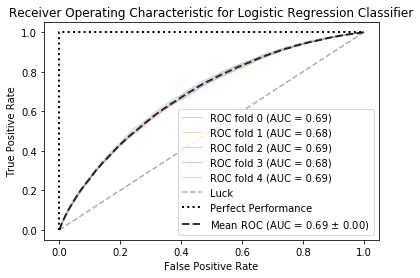

Logistic Regression Classifier:
cross-validation accuracy
0.84 +/- 0.001
              precision    recall  f1-score   support

           0       0.85      0.99      0.91    155711
           1       0.41      0.05      0.09     28849

    accuracy                           0.84    184560
   macro avg       0.63      0.52      0.50    184560
weighted avg       0.78      0.84      0.78    184560



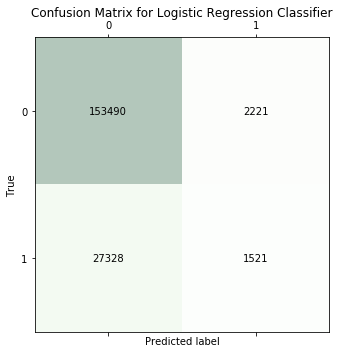

In [35]:
#LR
classifier_name = 'Logistic Regression Classifier'
model_pipeline_lr = run_cv(X_train, Y_train, LogisticRegression_classifier, classifier_name)

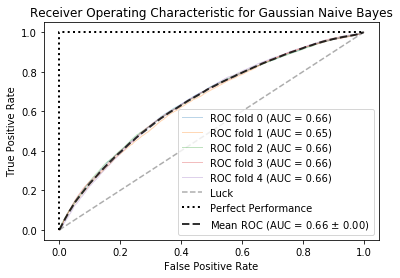

Gaussian Naive Bayes:
cross-validation accuracy
0.84 +/- 0.001
              precision    recall  f1-score   support

           0       0.85      0.98      0.91    155711
           1       0.35      0.05      0.09     28849

    accuracy                           0.84    184560
   macro avg       0.60      0.52      0.50    184560
weighted avg       0.77      0.84      0.78    184560



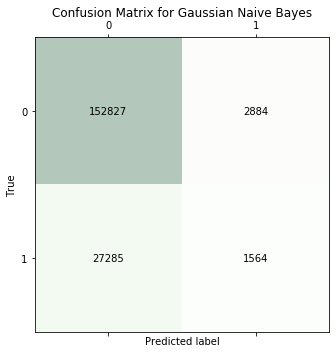

In [36]:
#NB
classifier_name = 'Gaussian Naive Bayes'
GaussianNB_classifier = GNB()
model_pipeline_gnb = run_cv(X_train, Y_train, GaussianNB_classifier, classifier_name)

C:\Users\MARAAM\Miniconda3\envs\snowflaskes\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\MARAAM\Miniconda3\envs\snowflaskes\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\MARAAM\Miniconda3\envs\snowflaskes\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\MARAAM\Miniconda3\envs\snowflaskes\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in

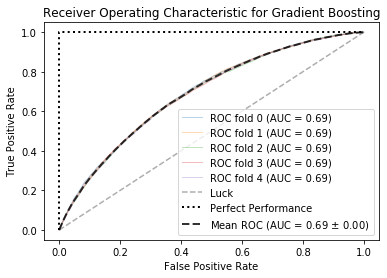

Gradient Boosting:
cross-validation accuracy
0.84 +/- 0.000
              precision    recall  f1-score   support

           0       0.85      1.00      0.91    155711
           1       0.44      0.02      0.03     28849

    accuracy                           0.84    184560
   macro avg       0.64      0.51      0.47    184560
weighted avg       0.78      0.84      0.78    184560



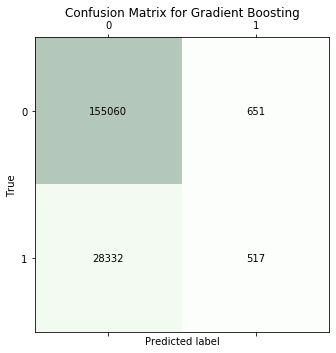

In [37]:
#GB
classifier_name = 'Gradient Boosting'
model_pipeline_gb = run_cv(X_train, Y_train, GradientBoosting_classifier, classifier_name)
dill.dump(model_pipeline_gb, open('GradientBoosting_model_AllFeatures.pkl', 'wb'))

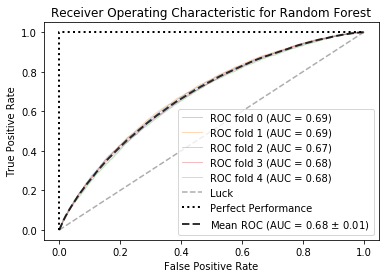

Random Forest:
cross-validation accuracy
0.84 +/- 0.000


C:\Users\MARAAM\Miniconda3\envs\snowflaskes\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.92    155711
           1       0.00      0.00      0.00     28849

    accuracy                           0.84    184560
   macro avg       0.42      0.50      0.46    184560
weighted avg       0.71      0.84      0.77    184560



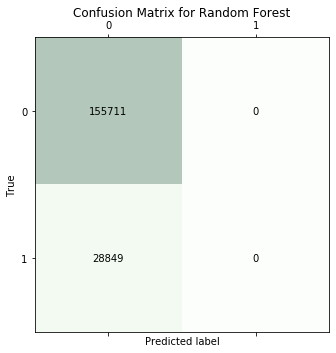

In [38]:
#RF
classifier_name = 'Random Forest'
model_pipeline_rf = run_cv(X_train, Y_train, RandomForest_classifier, classifier_name)
dill.dump(model_pipeline_rf,open('RandomForest_model_AllFeatures.pkl', 'wb'))

In [39]:
pick_df.to_pickle('combined.pkl')

In [27]:
pick_df = pd.read_pickle('combined.pkl')

         Ranking of Features

We will obtain a ranking of each feature using Random Forest classifier 

In [34]:
#Extract the classifier and trained gradient boosting from pipeline
import dill
with open('RandomForest_model_AllFeatures.pkl', 'rb') as f:
    model_pipeline_rf = dill.load(f)    

In [35]:
classifier = model_pipeline_rf

In [36]:
forest = classifier[1]

Feature importances

In [37]:
importances = forest.feature_importances_

In [38]:
print(forest.feature_importances_)

[0.1358437  0.0265556  0.10649799 0.09370854 0.07386699 0.03074551
 0.04336601 0.08120348 0.08430779 0.05061053 0.06890755 0.12336054
 0.         0.00478    0.         0.         0.00187937 0.01383775
 0.00441525 0.00503892 0.00558181 0.0027473  0.00810676 0.00701859
 0.00047356 0.00454267 0.00096048 0.00216179 0.00246615 0.00078345
 0.00402302 0.         0.00989374 0.00035112 0.00196406]


calculating the standard deviation(std) in the feature importance for each tree of Gradient Boosting 

In [67]:
sklearn.__version__

'0.22'

In [39]:
indices = np.argsort(importances)[::-1]

In [40]:
features = X_train.columns

In [41]:
features

Index(['int_rate', 'emp_length', 'annual_inc', 'dti', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'loan_amnt', 'term_ 36 months', 'term_ 60 months',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')

1 int_rate 0.1358436996654188
2 term_ 36 months 0.12336054018622841
3 annual_inc 0.10649799378303
4 dti 0.0937085431187244
5 revol_util 0.084307786619045
6 revol_bal 0.08120348039573055
7 earliest_cr_line 0.07386698930873949
8 loan_amnt 0.0689075454690814
9 total_acc 0.050610525527627896
10 open_acc 0.043366008883077525
11 inq_last_6mths 0.030745510664155946
12 emp_length 0.026555597077471474
13 home_ownership_RENT 0.013837754757742052
14 purpose_small_business 0.00989374041051732
15 purpose_credit_card 0.008106756077203526
16 purpose_debt_consolidation 0.0070185854735394185
17 verification_status_Verified 0.005581813157682832
18 verification_status_Source Verified 0.005038916277026938
19 home_ownership_MORTGAGE 0.004779995886360956
20 purpose_home_improvement 0.004542673203927683
21 verification_status_Not Verified 0.004415250302129873
22 purpose_other 0.004023021839804624
23 purpose_car 0.0027473042184407055
24 purpose_medical 0.0024661501387198185
25 purpose_major_purchase 0.0021617

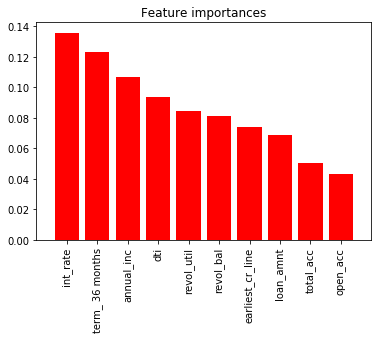

In [42]:
for f in range(X_train.shape[1]):
    print (f+1, features[indices[f]], importances[indices[f]])
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices[:10]], color="r", align="center")
plt.xticks(rotation=90)
plt.xticks(range(10), features[indices[:10]])
plt.xlim([-1, 10])
plt.show()

Training and validating model on top Features

In [43]:
classifier = model_pipeline_rf

select features based on threshold

In [44]:
from sklearn.feature_selection import SelectFromModel


In [45]:
sfm = SelectFromModel(classifier, threshold = 0, prefit = True)

In [46]:
X_select = sfm.transform(X)

In [47]:
X_select = pd.DataFrame(X_select)

Train/Test splitting

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_select_train, X_select_test, Y_select_train, Y_select_test = train_test_split(X_select, Y, test_size = 0.2, random_state = 5)

Training and validating on new dataset with select features to see the effect on different algorithms

C:\Users\MARAAM\Miniconda3\envs\snowflaskes\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\MARAAM\Miniconda3\envs\snowflaskes\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\MARAAM\Miniconda3\envs\snowflaskes\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\MARAAM\Miniconda3\envs\snowflaskes\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in

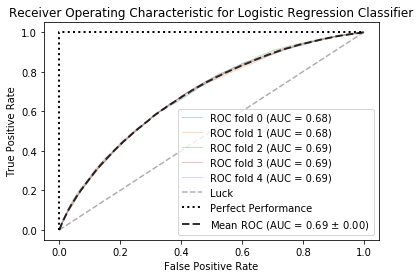

Logistic Regression Classifier:
cross-validation accuracy
0.84 +/- 0.001
              precision    recall  f1-score   support

           0       0.85      0.99      0.91    155711
           1       0.41      0.05      0.09     28849

    accuracy                           0.84    184560
   macro avg       0.63      0.52      0.50    184560
weighted avg       0.78      0.84      0.78    184560



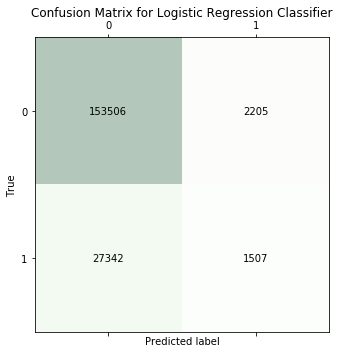

In [58]:
classifier_name = 'Logistic Regression Classifier'
model_SelectFeatures_pipeline_lr = run_cv(X_train, Y_train, LogisticRegression_classifier, classifier_name)

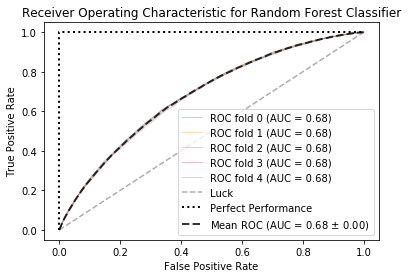

Random Forest Classifier:
cross-validation accuracy
0.84 +/- 0.000


C:\Users\MARAAM\Miniconda3\envs\snowflaskes\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.92    155711
           1       0.00      0.00      0.00     28849

    accuracy                           0.84    184560
   macro avg       0.42      0.50      0.46    184560
weighted avg       0.71      0.84      0.77    184560



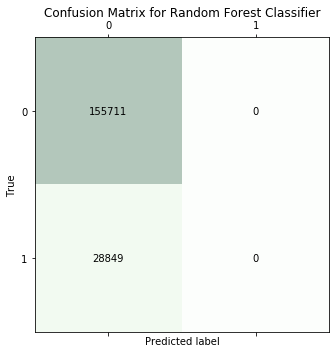

In [59]:
classifier_name = 'Random Forest Classifier'
model_SelectFeatures_pipeline_rf = run_cv(X_train, Y_train, RandomForest_classifier, classifier_name)

C:\Users\MARAAM\Miniconda3\envs\snowflaskes\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\MARAAM\Miniconda3\envs\snowflaskes\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\MARAAM\Miniconda3\envs\snowflaskes\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\MARAAM\Miniconda3\envs\snowflaskes\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in

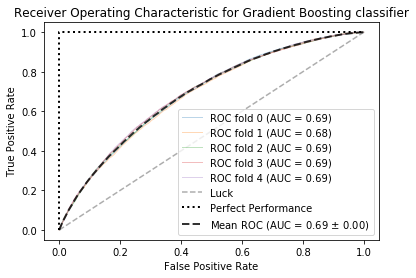

Gradient Boosting classifier:
cross-validation accuracy
0.84 +/- 0.000
              precision    recall  f1-score   support

           0       0.85      1.00      0.91    155711
           1       0.43      0.02      0.04     28849

    accuracy                           0.84    184560
   macro avg       0.64      0.51      0.48    184560
weighted avg       0.78      0.84      0.78    184560



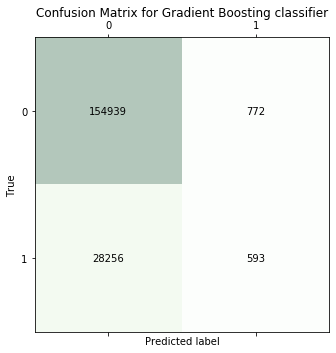

In [60]:
classifier_name = 'Gradient Boosting classifier'
model_SelectFeatures_pipeline_gb = run_cv(X_train, Y_train, GradientBoosting_classifier, classifier_name)

In [61]:
pick_df.to_pickle('all.pkl')

In [50]:
pick_df = pd.read_pickle('all.pkl')

Selecting a Model

In [51]:
print('Random Forest Classifier')
print('Evaluating on the full training to get the best hyperparameters using grid search')
gridsearch_rf.fit(X_select_train, Y_select_train)

Random Forest Classifier
Evaluating on the full training to get the best hyperparameters using grid search


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              warm_start=False),
             iid='deprecated', n_jobs=-1,
    

In [52]:
pick_df.to_pickle('selected_model.pkl')

In [53]:
gridsearch_best_estimator_rf = gridsearch_rf.best_estimator_
dill.dump(gridsearch_best_estimator_rf, open('RandomForest_gridsearch_fulltrainingset.pkl', 'wb'))

In [54]:
print('Best Parameters %s' % gridsearch_rf.best_params_)

Best Parameters {'class_weight': {0: 0.8, 1: 0.2}, 'criterion': 'entropy', 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 100, 'n_estimators': 20}


Evaluation metrics on the full training and testing set

In [56]:
print('Training Accuracy:', gridsearch_rf.score(X_select_train, Y_select_train))
print('Testing Accuracy:', gridsearch_rf.score(X_select_test, Y_select_test))

Training Accuracy: 0.8436876896402254
Testing Accuracy: 0.8428912006935414


In [57]:
from sklearn.metrics import classification_report

In [60]:
print('Training Accuracy %.2f' %(gridsearch_rf.score(X_select_train, Y_select_train)))
print('Training Classification Report')
print(classification_report(Y_select_train, gridsearch_rf.predict(X_select_train)))

Training Accuracy 0.84
Training Classification Report


C:\Users\MARAAM\Miniconda3\envs\snowflaskes\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.84      1.00      0.92    155711
           1       0.00      0.00      0.00     28849

    accuracy                           0.84    184560
   macro avg       0.42      0.50      0.46    184560
weighted avg       0.71      0.84      0.77    184560



In [62]:
print('Test Accuracy %.2f' %(gridsearch_rf.score(X_select_test, Y_select_test)))
print('Test Classification Report')
print(classification_report(Y_select_test, gridsearch_rf.predict(X_select_test)))

Test Accuracy 0.84
Test Classification Report
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     38891
           1       0.00      0.00      0.00      7249

    accuracy                           0.84     46140
   macro avg       0.42      0.50      0.46     46140
weighted avg       0.71      0.84      0.77     46140



C:\Users\MARAAM\Miniconda3\envs\snowflaskes\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
pickle.dump(gridsearch_rf, open('final_model.pkl', 'wb'))